# Tarea Semanal 8

In [1]:
# Primer Entrega (la parte 1 esta mal)

from IPython.display import IFrame
IFrame("./pdf/Tarea semanal 8, 1ra entrega.pdf", width=900, height=1000)

In [2]:
# Corrección de la primer Entrega 

from IPython.display import IFrame
IFrame("./pdf/Tarea semanal 8, corrección parte 1.pdf", width=1000, height=1000)

## Filtros Digitales - TP5 Eje2:
<img src="./img/tp5Ej2.png" align="left"  />

(2, <AxesSubplot:xlabel='$\\sigma$', ylabel='j$\\omega$'>)

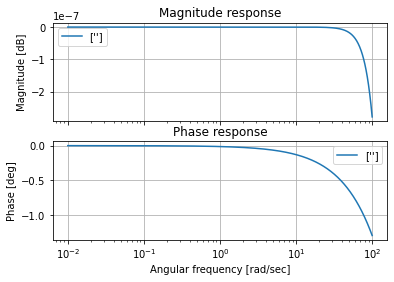

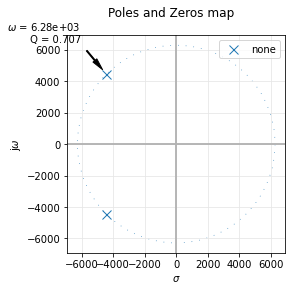

In [2]:
# Filtro Butter analogico

from splane import pzmap, bodePlot
from scipy.signal import TransferFunction
import matplotlib.pyplot as plt
import numpy as np

w01 = 2 * np.pi * 1000
Q1 = np.sqrt(2) / 2

numerador1 = [w01**2]
denominador1 = [1,w01/Q1,w01**2]

my_tf1 = TransferFunction(numerador1, denominador1)

bodePlot(my_tf1,1)

pzmap(my_tf1,2)

In [7]:
# Polos del filtro Digital

fs = 100
Wp = 1 #Normalizado
k = 2 * fs
Q = np.sqrt(2) / 2

b0 = Wp**2
b1 = 2 * b0
b2 = b0

const = k**2 + k * Wp/Q + Wp**2

a0 =  1
a1 = (2 * Wp**2 - 2 * k**2) / (const)
a2 = (k**2 - k * Wp/Q + Wp**2) / (const)

print("b0 = " + str(b0) + ", b1 = " + str(b1) + ", b2 = " + str(b2))
print("a0 = " + str(a0) + ", a1 = " + str(a1) + ", a2 = " + str(a2))

np.roots([a0,a1,a2])

b0 = 1, b1 = 2, b2 = 1
a0 = 1, a1 = -1.9858582154384985, a2 = 0.9859575108316552


array([0.99292911+0.00702124j, 0.99292911-0.00702124j])

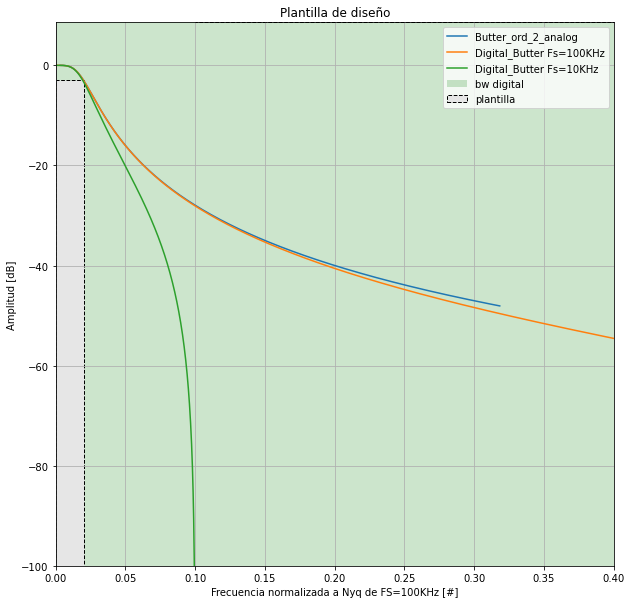

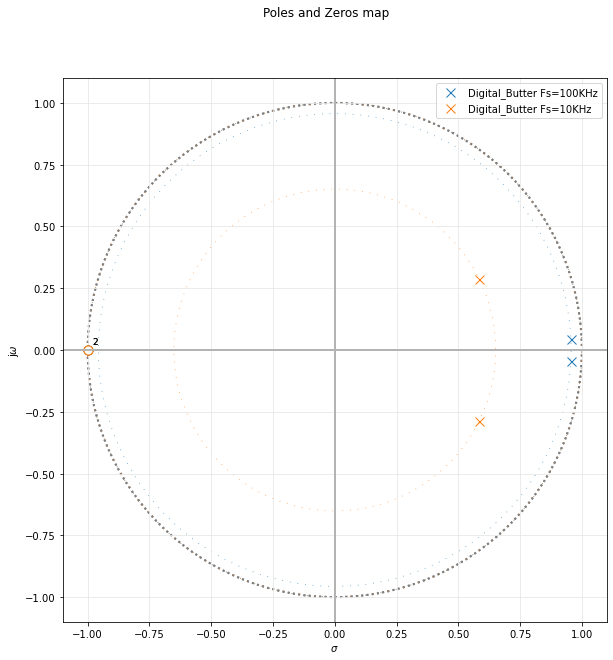

In [3]:
import numpy as np
import scipy.signal as sig
import matplotlib as mpl
import matplotlib.pyplot as plt
from splane import analyze_sys, plot_plantilla, pzmap

# Setup inline graphics
mpl.rcParams['figure.figsize'] = (10,10)
filter_names = []
analog_filters_names = []
digital_filters_names = []

f0 = 1e3 # normalizado respecto a nyq (fs/2)
w0 =  2*np.pi*f0  # 
fs = 100e3
fs_2 = 10e3

fpass = f0/(fs/2) # 
fstop = 5e3/(fs/2) # 
filter_type = 'lowpass'
ripple = 3
attenuation = -10

z,p,k = sig.buttap(2)
z, p, k = sig.lp2lp_zpk(z, p, k, wo = w0)

num, den = sig.zpk2tf(z,p,k)
my_analog_filter = sig.TransferFunction(num,den)
my_analog_filter_desc = 'Butter' + '_ord_' + str(2) + '_analog'

filter_names.append(my_analog_filter_desc)

numz, denz = sig.bilinear(num, den, fs)
my_digital_filter = sig.TransferFunction(numz, denz, dt=1/fs)
my_digital_filter_desc = 'Digital_Butter Fs=100KHz'
filter_names.append(my_digital_filter_desc)

numz, denz = sig.bilinear(num, den, fs_2)
my_digital_filter_2 = sig.TransferFunction(numz, denz, dt=1/fs_2)
my_digital_filter_desc_2 = 'Digital_Butter Fs=10KHz'
filter_names.append(my_digital_filter_desc_2)

plt.figure(1)
plt.cla()

npoints = 1000
w_nyq = 2*np.pi*fs/2

w, mag, _ = my_analog_filter.bode(npoints)
plt.plot(w/w_nyq, mag, label=my_analog_filter_desc)

w, mag, _ = my_digital_filter.bode(npoints)
plt.plot(w/w_nyq, mag, label=my_digital_filter_desc)

w, mag, _ = my_digital_filter_2.bode(npoints)
plt.plot(w/w_nyq, mag, label=my_digital_filter_desc_2)


plt.title('Plantilla de diseño')
plt.xlabel('Frecuencia normalizada a Nyq de FS=100KHz [#]')
plt.ylabel('Amplitud [dB]')
plt.grid(which='both', axis='both')

plt.gca().set_xlim([0, 0.4])
plot_plantilla(filter_type = filter_type , fpass = fpass, ripple = ripple , fstop = fstop, attenuation = attenuation, fs = fs)

digital_fig_id, _ = pzmap(my_digital_filter, filter_description=my_digital_filter_desc, fig_id = 2)
digital_fig_id, _ = pzmap(my_digital_filter_2, filter_description=my_digital_filter_desc_2, fig_id = 2)